## Import Libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

### Read an image

The type of this input is <class 'numpy.ndarray'>
Shape: (656, 875, 3)


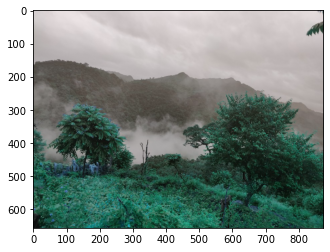

In [2]:
image = cv2.imread('sample_image.jpeg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


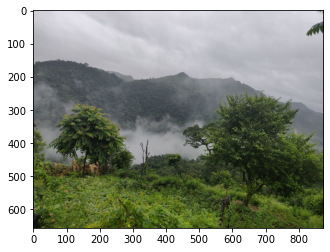

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

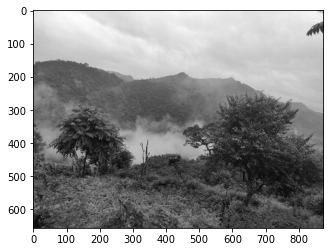

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')


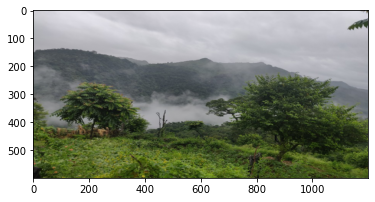

In [5]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# Color Identification

### RGB to Hex Conversion

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

### Read image in RGB color space

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

### Get colors from an image

[array([80.95934673, 87.83506388, 88.49959523]),
 array([206.75943373, 206.43417027, 213.94456316]),
 array([62.10062198, 76.32759733, 34.77463718]),
 array([148.31354506, 150.29985411, 152.22949164]),
 array([ 97.60114161, 114.31886778,  47.65724451]),
 array([182.36526378, 182.80908761, 189.74666965]),
 array([32.05353745, 41.46082019, 20.90448731]),
 array([112.97564114, 118.23400479, 115.09614873])]

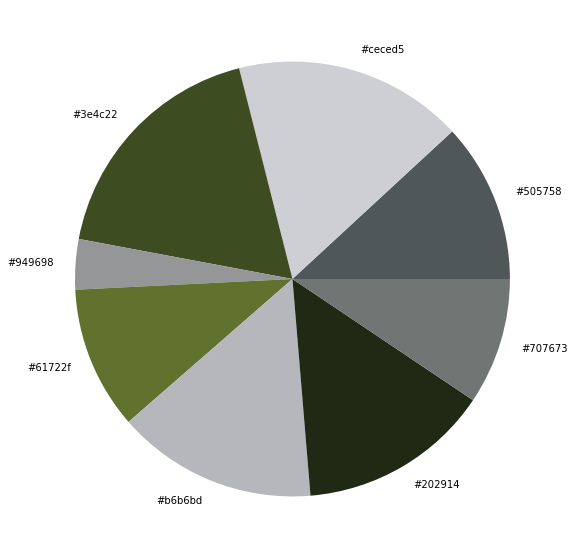

In [8]:
def get_Colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (16, 10))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

get_Colors(get_image('sample_image.jpeg'), 8, True)